<a href="https://colab.research.google.com/github/Park-SungUk/AI-for-deeplearning/blob/main/Chapter02_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 02. 데이터 다루기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = np.column_stack((fish_length,fish_weight))
print(fish_data[:5]) #모든 열, 5행까지
fish_target = np.concatenate((np.ones(35),np.zeros(14))) #concatenate : 한행에 연결, column_stack : 열단위로 연결
print(fish_target)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
train_input, test_input,train_target,test_target = train_test_split(fish_data, fish_target,stratify = fish_target,random_state=42)
#훈련용 x ,y 검정용 x,y = train_test_split(x데이터, y데이터) (random_state : randomseed역할) 기본 25%
#stratify = fish_target : 표본 나눌때 골고루 섞이게 나눌것것
print(train_input.shape, test_input.shape)
print(test_target)

(36, 2) (13, 2)
[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input,test_target)

1.0

### 문제 : 25,150 데이터 인식

In [ ]:
train_input[1:1]

array([], shape=(0, 2), dtype=float64)

In [ ]:
print(kn.predict([[25,150]])) #25,150 데이터를 빙어(0)으로 인식

[0.]


<function matplotlib.pyplot.show(close=None, block=None)>

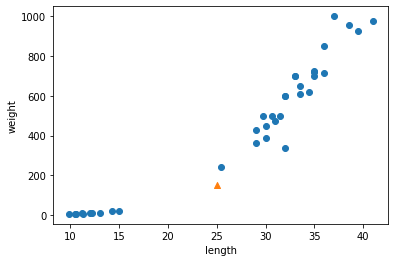

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1]) #scatter : matplot.pyplot에 있음.
#[:,0] : 모든행, 1열 : x
#[:,1] : 모든행, 2열 : y
plt.scatter(25,150,marker="^") #도미데이터나 빙어로 인식식
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [ ]:
distances, indexes = kn.kneighbors([[25,150]]) #2차원배열은 2차원으로 적기
#knn 알고리즘이 사용했던 거리와 index반환
print(distances)
print(indexes)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
[[21 33 19 30  1]]


<function matplotlib.pyplot.show(close=None, block=None)>

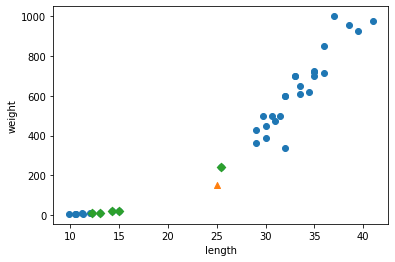

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^") #도미데이터나 빙어로 인식식
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D') #아까 index들 표현하기기
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [ ]:
print(train_input[indexes]); print(train_target[indexes])
print(distances)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]
[[1. 0. 0. 0. 0.]]
[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


####표준화 시키기 - 기준맞추기

<function matplotlib.pyplot.show(close=None, block=None)>

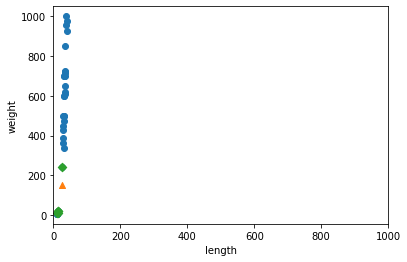

In [ ]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker="^") #도미데이터나 빙어로 인식식
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D') #아까 index들 표현하기기
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0,1000) #똑같이 x축을 1000으로 맞추어보기
plt.show
#그림에서 볼수있듯이 척도가 안맞아서 잘못보았던것

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


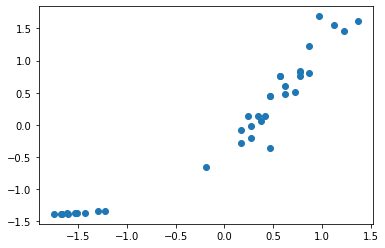

In [ ]:
#표준화
mean = np.mean(train_input,axis=0) #평균 : np.mean, axis = 0 : 열기준으로 평균
std = np.std(train_input, axis=0) #그냥 axis변수 없으면 전체함
print(mean,std)

train_scaled = (train_input-mean)/std
test_scaled = (test_input-mean)/std #같은기준으로 표준화(train mean이더라도도)
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.show()

In [ ]:
#전처리 데이터로 모델 훈련하기
kn.fit(train_scaled, train_target) #target은 1,0이니까 당연히 표준화X
kn.score(test_scaled, test_target) #점수내기
new = ([25,150]-mean)/std
print(kn.predict([new])) #1로 제대로 인식

[1.]


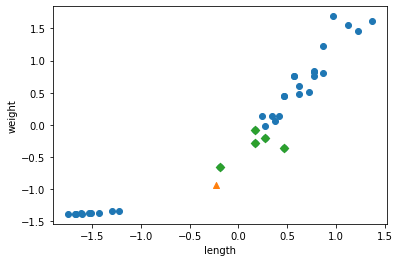

In [ ]:
#시각화
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()